In [174]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
imc_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\currencies\FX_AUDJPY, D.csv',index_col='time',parse_dates=True)

In [200]:
imc_df.columns

Index(['open', 'high', 'low', 'close', 'FEF1!, SGX: Open', 'FEF1!, SGX: High',
       'FEF1!, SGX: Low', 'FEF1!, SGX: Close', 'VIX, TVC: Open',
       'VIX, TVC: High', 'VIX, TVC: Low', 'VIX, TVC: Close',
       'AU06Y-JP06Y, TVC: Open', 'AU06Y-JP06Y, TVC: High',
       'AU06Y-JP06Y, TVC: Low', 'AU06Y-JP06Y, TVC: Close',
       'AU04Y-JP04Y, TVC: Open', 'AU04Y-JP04Y, TVC: High',
       'AU04Y-JP04Y, TVC: Low', 'AU04Y-JP04Y, TVC: Close',
       'AU03Y-JP03Y, TVC: Open', 'AU03Y-JP03Y, TVC: High',
       'AU03Y-JP03Y, TVC: Low', 'AU03Y-JP03Y, TVC: Close',
       'AU05Y-JP05Y, TVC: Open', 'AU05Y-JP05Y, TVC: High',
       'AU05Y-JP05Y, TVC: Low', 'AU05Y-JP05Y, TVC: Close',
       'AU02Y-JP02Y, TVC: Open', 'AU02Y-JP02Y, TVC: High',
       'AU02Y-JP02Y, TVC: Low', 'AU02Y-JP02Y, TVC: Close',
       'AU10Y-JP10Y, TVC: Open', 'AU10Y-JP10Y, TVC: High',
       'AU10Y-JP10Y, TVC: Low', 'AU10Y-JP10Y, TVC: Close', 'MA',
       'Smoothing Line', 'Volume', 'Volume MA', 'Basic EPS', 'EPS estimates',
   

In [201]:
imc_df.tail()

,open,high,low,close,"FEF1!, SGX: Open","FEF1!, SGX: High","FEF1!, SGX: Low","FEF1!, SGX: Close","VIX, TVC: Open","VIX, TVC: High",...,"AU10Y-JP10Y, TVC: Low","AU10Y-JP10Y, TVC: Close",MA,Smoothing Line,Volume,Volume MA,Basic EPS,EPS estimates,Average basic shares outstanding,Diluted shares outstanding
time,,,,,,,,,,,,,,,,,,,,,
2023-04-16 21:00:00+00:00,89.661,90.156,89.586,90.058,119.20,120.00,118.00,120.00,17.58,17.79,...,2.901,2.990,89.99036,90.431834,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17 21:00:00+00:00,90.058,90.511,89.975,90.129,120.00,121.45,119.65,120.25,16.94,17.34,...,2.980,3.035,89.96986,90.386739,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18 21:00:00+00:00,90.129,90.586,90.110,90.395,120.80,120.90,119.95,120.00,17.30,17.72,...,3.024,3.058,89.95904,90.344736,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-19 21:00:00+00:00,90.395,90.779,90.247,90.447,120.00,120.00,119.30,119.55,16.85,17.69,...,3.010,3.010,89.94434,90.304639,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-20 21:00:00+00:00,90.447,90.532,89.399,89.708,119.25,119.25,117.05,117.41,17.51,17.71,...,2.992,3.028,89.92114,90.265782,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

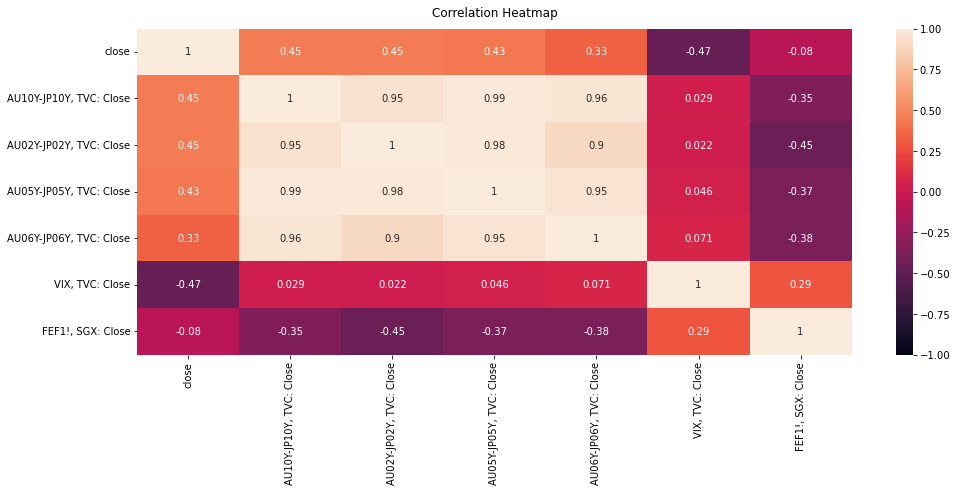

In [204]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imc_df[['close','AU10Y-JP10Y, TVC: Close','AU02Y-JP02Y, TVC: Close','AU05Y-JP05Y, TVC: Close','AU06Y-JP06Y, TVC: Close','VIX, TVC: Close','FEF1!, SGX: Close']].corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

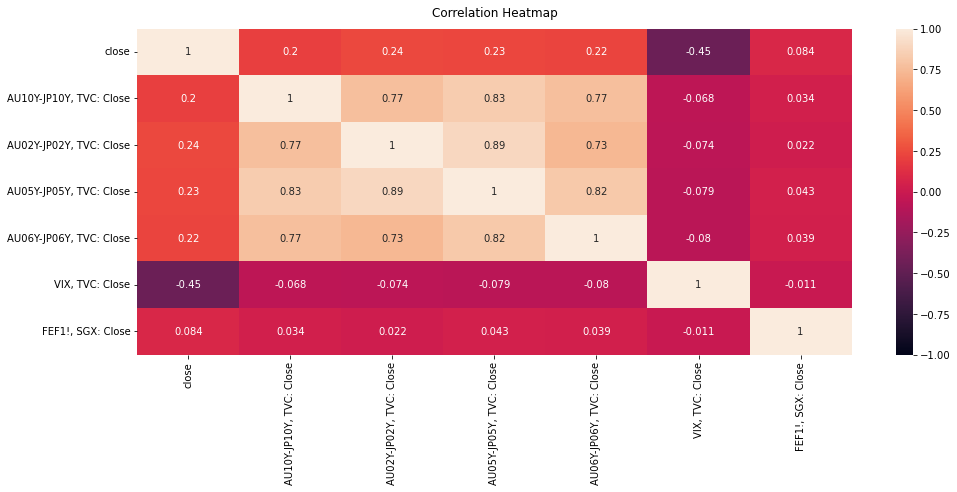

In [205]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imc_df[['close','AU10Y-JP10Y, TVC: Close','AU02Y-JP02Y, TVC: Close','AU05Y-JP05Y, TVC: Close','AU06Y-JP06Y, TVC: Close','VIX, TVC: Close','FEF1!, SGX: Close']].diff(1).corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [206]:
from statsmodels.multivariate.pca import PCA

In [207]:
pca_logDiff_df = imc_df[['close','AU10Y-JP10Y, TVC: Close','AU02Y-JP02Y, TVC: Close','AU05Y-JP05Y, TVC: Close','AU06Y-JP06Y, TVC: Close','VIX, TVC: Close','FEF1!, SGX: Close']].diff(1).dropna(axis=0)

In [258]:
pca_event = {

    'nComp':5,
    'dataframe':r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\currencies\FX_AUDCAD, D.csv',
    'constant_correlation':True,
    'column':'ZC1!, CBOT: Close',
}

In [259]:
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

In [260]:
forecast=0
for i in range(1,pca_event['nComp']):
    forecast+= pc.factors['comp_'+str(i)]# pc.eigenvecs['eigenvec_'+str(i)][i]* # I think this could be wrong here RESEARCH AND FIX


In [261]:
len(forecast.cumsum()*imc_df['close'][0])

2142

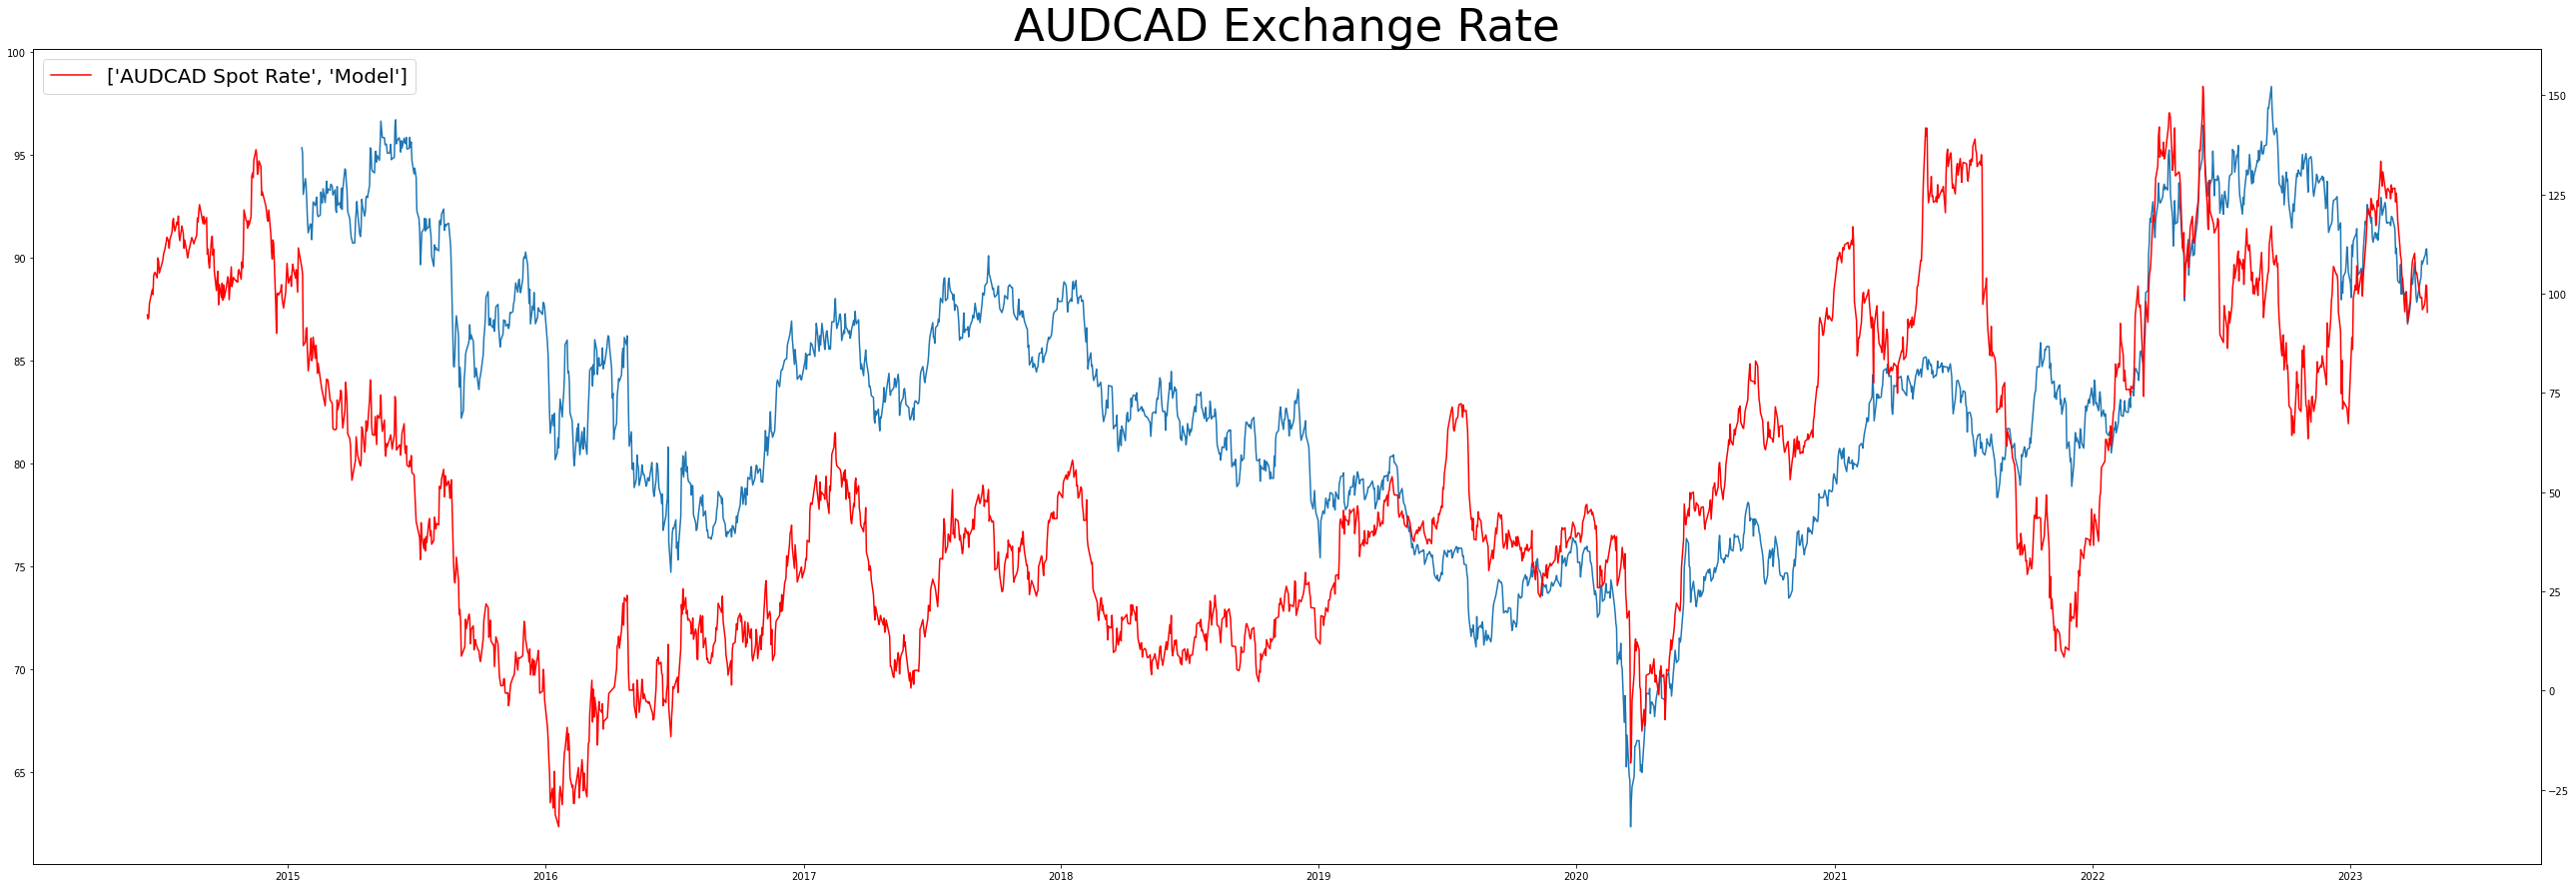

In [274]:
plt.figure(figsize=(45,15))

plt.title('AUDCAD Exchange Rate',fontsize=45)
plt.plot(imc_df['close'][-len(forecast.cumsum()*imc_df['close'][0]):])
plt.twinx()
plt.plot(forecast.cumsum()*imc_df['close'][-len(forecast.cumsum())]+ imc_df['close'].iloc[-len(forecast.cumsum()*imc_df['close'][-len(forecast.cumsum())])],color='red')

plt.legend([["AUDCAD Spot Rate","Model"]],fontsize=20)

plt.show()

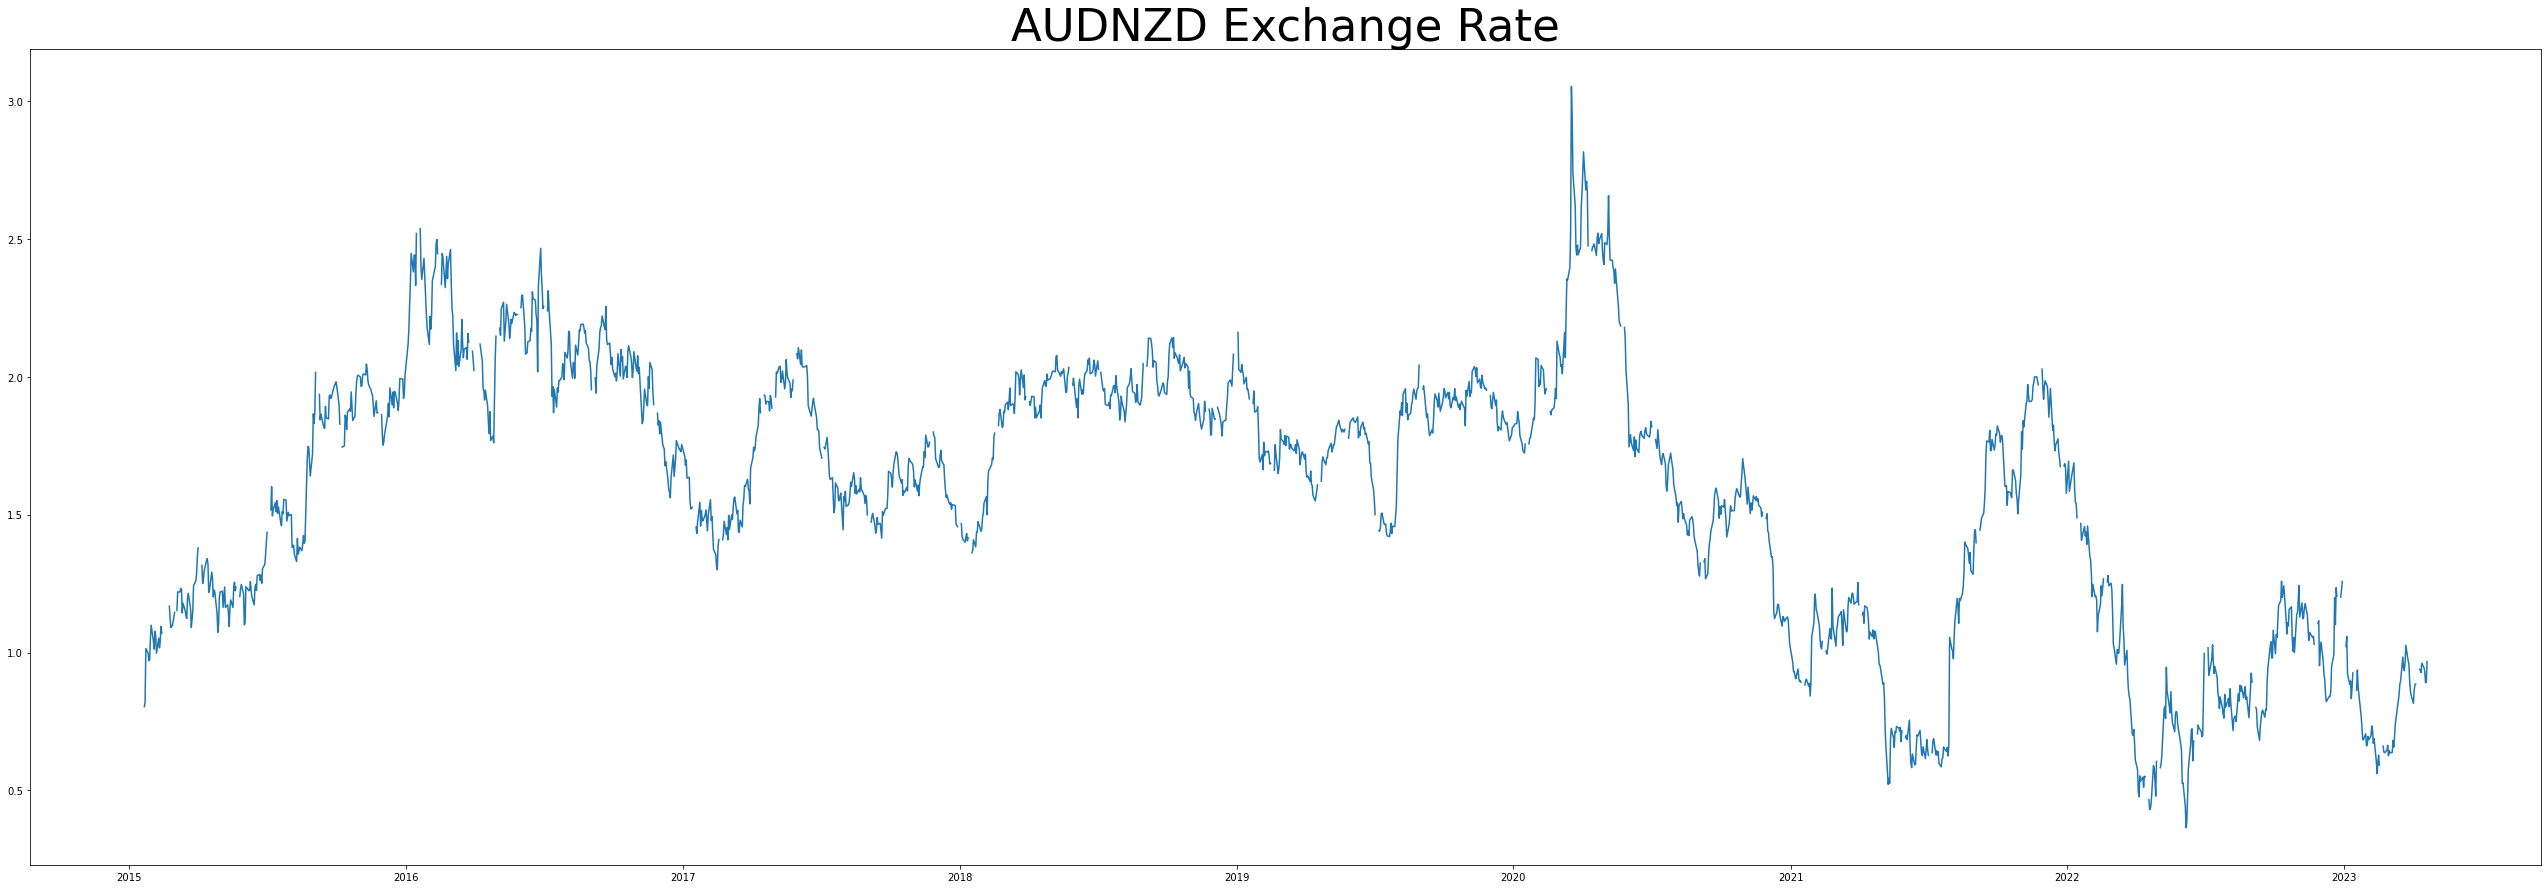

In [263]:
plt.figure(figsize=(45,15))

plt.title('AUDNZD Exchange Rate',fontsize=45)
plt.plot((-forecast.cumsum()*imc_df['close'][0]+ imc_df['close'].iloc[len(forecast.cumsum()*imc_df['close'][0])])/(imc_df['close'][-len(forecast.cumsum()*imc_df['close'][0]):]))

plt.show()

In [264]:

rs = (-forecast.cumsum()*imc_df['close'][0]+ imc_df['close'].iloc[len(forecast.cumsum()*imc_df['close'][0])])/(imc_df['close'][-len(forecast.cumsum()*imc_df['close'][0]):])

In [265]:
rs_diff = rs.diff(1)

In [266]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [267]:
rs_diff.dropna()

time
2015-01-21 22:00:00+00:00    0.016584
2015-01-22 22:00:00+00:00    0.194698
2015-01-25 22:00:00+00:00   -0.017203
2015-01-26 22:00:00+00:00   -0.027380
2015-01-27 22:00:00+00:00    0.004142
                               ...   
2023-04-16 21:00:00+00:00   -0.016638
2023-04-17 21:00:00+00:00   -0.015241
2023-04-18 21:00:00+00:00   -0.038289
2023-04-19 21:00:00+00:00    0.001510
2023-04-20 21:00:00+00:00    0.074938
Length: 1925, dtype: float64

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


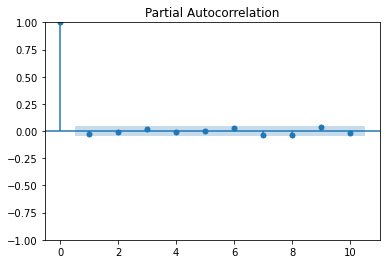

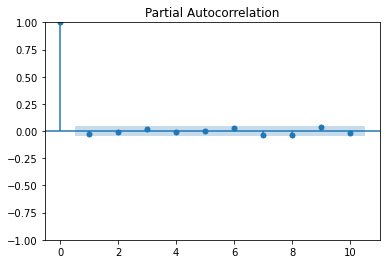

In [268]:
plot_pacf(rs_diff.dropna(), alpha=0.05, lags=10)

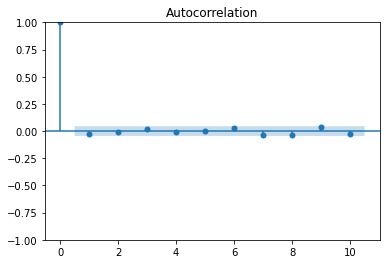

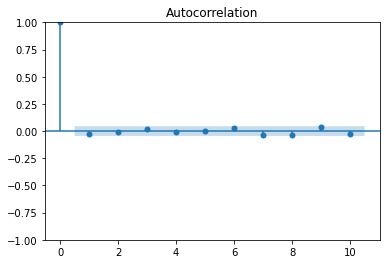

In [269]:
plot_acf(rs_diff.dropna(), alpha=0.05, lags=10)

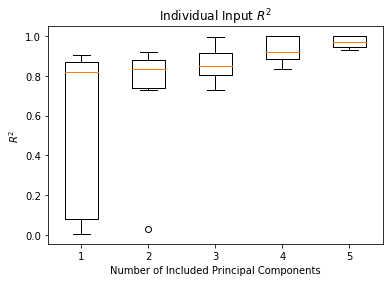

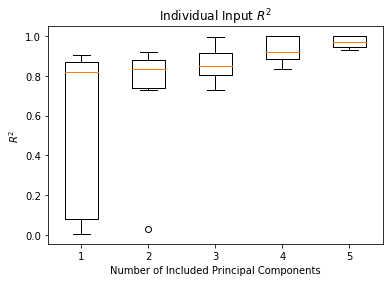

In [270]:
pc.plot_rsquare()

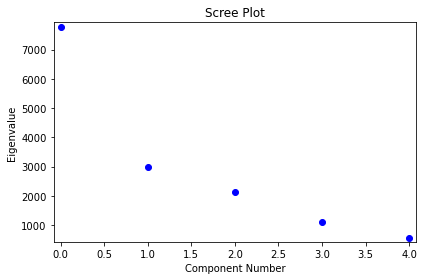

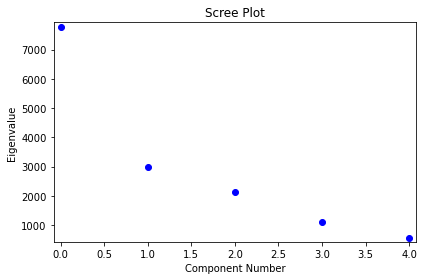

In [271]:
pc.plot_scree(log_scale=False)

In [272]:
pc.project(transform=True)

,close,"AU10Y-JP10Y, TVC: Close","AU02Y-JP02Y, TVC: Close","AU05Y-JP05Y, TVC: Close","AU06Y-JP06Y, TVC: Close","VIX, TVC: Close","FEF1!, SGX: Close"
time,,,,,,,
2014-06-15 21:00:00+00:00,-0.144153,-0.037040,-0.022745,-0.030399,-0.033054,0.472385,-1.580106
2014-06-16 21:00:00+00:00,-0.412515,-0.045597,-0.057208,-0.054666,-0.048466,-0.591022,1.328606
2014-06-17 21:00:00+00:00,0.568869,0.036940,0.022250,0.028798,0.032124,-1.442364,-0.425011
2014-06-18 21:00:00+00:00,-0.065695,-0.079539,-0.060986,-0.071311,-0.073031,0.000778,1.548270
2014-06-19 21:00:00+00:00,-0.064045,0.019702,0.005684,0.012654,0.015479,0.243179,2.243225
...,...,...,...,...,...,...,...
2023-04-16 21:00:00+00:00,0.348828,0.037132,0.030730,0.034899,0.034758,-0.124408,0.552546
2023-04-17 21:00:00+00:00,0.075060,0.035495,0.062022,0.054873,0.043668,-0.094676,0.234635
2023-04-18 21:00:00+00:00,0.264615,0.032592,0.089167,0.071028,0.050257,-0.398662,-0.242943
